In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.cm as cm

import numpy as np

import skimage.transform
from scipy import ndimage
import scipy.misc

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.axis('off')
  plt.show()

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS

#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/ai-challenger/model/showattentell.finetune/', '')
  
import sys, os, math
import gezi, melt
import numpy as np

from deepiu.util import algos_factory
from deepiu.seq2seq.rnn_decoder import SeqDecodeMethod

#debug
from deepiu.util import text2ids

TEXT_MAX_WORDS = 100    
decode_max_words = 20


from deepiu.util import ids2text
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic-finetune/vocab.txt'
ids2text.init(vocab_path)

image_dir = image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'
image_path = os.path.join(image_dir, image_file)
image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'
image_model_name='InceptionResnetV2'

#FLAGS.model_dir = model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model/showattentell2.finetune/'
#FLAGS.model_dir = model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v3.main/showattentell.coverage.finetune.biglr3/'
FLAGS.model_dir = model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/showattentell.coverage.finetune/epoch/model.ckpt-13.60-446216'

image_model_name = melt.image.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
FLAGS.image_model_name = image_model_name
print(FLAGS.image_model_name)
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, feature_name='attention')
else:
  image_model = None
print('image_model', image_model)

import libpinyin
pinyin = libpinyin.Pinyin()
pinyin.Load('./data/pinyin/')

tensorflow_version: 1.4.0-rc1


INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic-finetune/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words
InceptionResnetV2
image_model None


ENCODE_UNK 1


tough still here but not needed for inference

In [2]:
predictor = melt.TextPredictor(FLAGS.model_dir) 

load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v4/showattentell.coverage.finetune/epoch/model.ckpt-13.60-446216.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v4/showattentell.coverage.finetune/epoch/model.ckpt-13.60-446216.map duration: 13.5873849392


In [3]:
def predict(image_path, predictor, length_normalization_factor=0.25, num_show=1):
  img = melt.read_image(image_path)
  if image_model:
    feature = image_model.gen_feature(img) if image_model is not None else img
  else:
    feature = [img]

  timer = gezi.Timer()
  texts, scores = predictor.predict_text(feature)
  for i, (text, score) in enumerate(zip(texts[0], scores[0])):
    print(ids2text.ids2text(text), score)

  print('beam search using time(ms):', timer.elapsed_ms())

In [ ]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg:  /home/gezi/data2/data/shijuezhongguo/pic/zouhongjian1.jpg


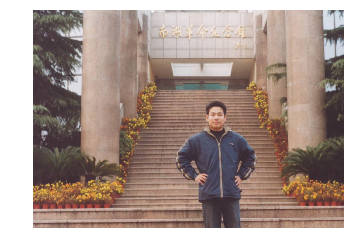

一个 双手 叉腰 的 男人 站 在 室外 的 台阶 上 </S> 0.204523
一个 双手 叉 着 腰 的 男人 站 在 室外 的 台阶 上 </S> 0.17861
一个 双手 叉腰 的 男人 站 在 房屋 外 的 台阶 上 </S> 0.112025
室外 的 台阶 上 站 着 一个 双手 叉腰 的 男人 </S> 0.111538
一个 双手 叉 着 腰 的 男人 站 在 屋外 的 台阶 上 </S> 0.110141
室外 的 台阶 旁站 着 一个 双手 叉腰 的 男人 </S> 0.0973079
一个 双手 叉腰 的 男人 站 在 房屋 前 的 台阶 上 </S> 0.0964283
室外 有 一个 双手 叉腰 的 男人 站 在 台阶 上 </S> 0.0847275
一个 双手 叉 着 腰 的 男人 站 在 房屋 外 的 台阶 上 </S> 0.0755761
一个 双手 叉腰 的 男人 站 在 室外 的 台阶 前 </S> 0.0695637
beam search using time(ms): 3748.73995781


In [ ]:
while True:
  image_name = raw_input('image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
        continue
  plt.subplot(1, 1, 1)
  image_show(image_path)
  predict(image_path, predictor)
  #predict(image_path, predictor2, gen_feature=False)

In [ ]:
import glob 
for img in glob.glob('/home/gezi/new2/data/ai_challenger/image_caption/test_pic/*.jpg'):
    image_show(img)
    predict(img, predictor)